# Training a perceptron model on the Iris dataset

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
# Self-defined modules
from perceptron import Perceptron

## Read Iris dataset to dataframe

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
[[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]
 [ 5.4  1.7]
 [ 4.6  1.4]
 [ 5.   1.5]
 [ 4.4  1.4]
 [ 4.9  1.5]
 [ 5.4  1.5]
 [ 4.8  1.6]
 [ 4.8  1.4]
 [ 4.3  1.1]
 [ 5.8  1.2]
 [ 5.7  1.5]
 [ 5.4  1.3]
 [ 5.1  1.4]
 [ 5.7  1.7]
 [ 5.1  1.5]
 [ 5.4  1.7]
 [ 5.1  1.5]
 [ 4.6  1. ]
 [ 5.1  1.7]
 [ 4.8  1.9]
 [ 5.   1.6]
 [ 5.   1.6]
 [ 5.2  1.5]
 [ 5.2  1.4]
 [ 4.7  1.6]
 [ 4.8  1.6]
 [ 5.4  1.5]
 [ 5.2  1.5]
 [ 5.5  1.4]
 [ 4.9  1.5]
 [ 5.   1.2]
 [ 5.5  1.3]
 [ 4.9  1.5]
 [ 4.4  1.3]
 [ 5.1  1.5]
 [ 5.   1.3]
 [ 4.5  1.3]
 [ 4.4  1.3]
 [ 5.   1.6]
 [ 5.1  1.9]
 [ 4.8  1.4]
 [ 5.1  1.6]
 [ 4.6  1.4]
 [ 5.3  1.5]
 [ 5.   1.4]
 [ 7.   4.7]
 [ 6.4  4.5]
 [ 6.9  4.9]
 [ 5.5

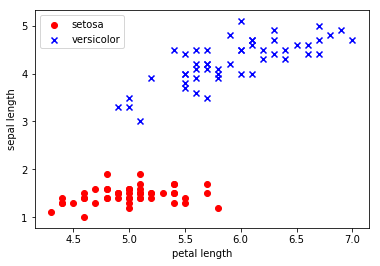

In [3]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# get Sepal length and Petal Length
X = df.iloc[0:100, [0,2]].values
print (y)
print (X)
plt.scatter(X[:50, 0],X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0],X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

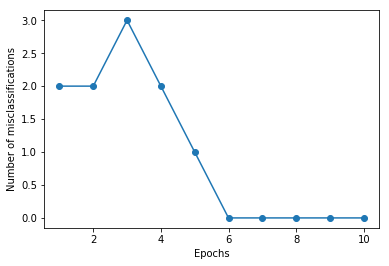

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Visualize the decision boundaries

In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    print(xx1.ravel(), xx2.ravel())
    print(xx1.ravel().shape, xx2.shape)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

[ 3.3   3.32  3.34 ...,  7.94  7.96  7.98] [ 0.    0.    0.   ...,  6.08  6.08  6.08]
(71675,) (305, 235)


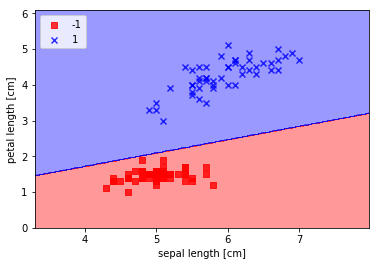

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

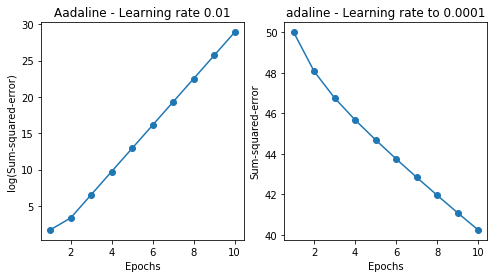

In [7]:
from adalinegd import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Aadaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
          ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('adaline - Learning rate to 0.0001')
plt.show()